<a href="https://colab.research.google.com/github/nmningmei/LevelUpPythonTutorial/blob/master/30_3_ttest%2C_ANOVA%2C_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# T-tests

## one-sample t-test

### generate the data from normal distribution

mean = 100.0000,standard error = 2.0381


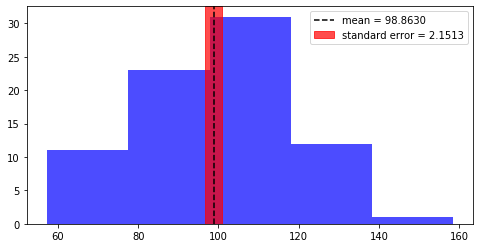

In [0]:
mean = 100
standard_deviation = 18
n_samples = 78
theoretic_standard_error = standard_deviation / np.sqrt(n_samples)
print(f'mean = {mean:.4f},standard error = {theoretic_standard_error:.4f}')
np.random.seed(12345)
samples = np.random.normal(loc = mean, scale = standard_deviation, size = n_samples)
fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples,bins = 5,alpha = 0.7,color = 'blue')
_ = ax.axvline(samples.mean(),linestyle = '--',color = 'black',alpha = 1.,label = f'mean = {samples.mean():.4f}')
_ = ax.axvspan(samples.mean() - samples.std()/np.sqrt(n_samples),
               samples.mean() + samples.std() / np.sqrt(n_samples), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples.std() / np.sqrt(n_samples):.4f}')
_ = ax.legend()

In [0]:
stats.ttest_1samp(samples,100,)

Ttest_1sampResult(statistic=-0.5251460594920753, pvalue=0.6009905475805698)

mean = 106.0000,standard error = 2.0381


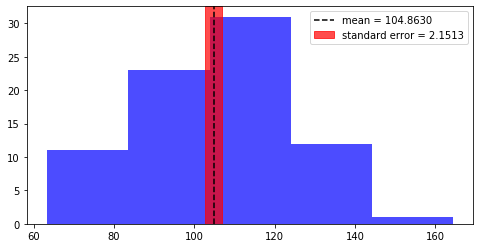

In [0]:
mean = 106
standard_deviation = 18
n_samples = 78
theoretic_standard_error = standard_deviation / np.sqrt(n_samples)
print(f'mean = {mean:.4f},standard error = {theoretic_standard_error:.4f}')
np.random.seed(12345)
samples = np.random.normal(loc = mean, scale = standard_deviation, size = n_samples)
fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples,bins = 5,alpha = 0.7,color = 'blue')
_ = ax.axvline(samples.mean(),linestyle = '--',color = 'black',alpha = 1.,label = f'mean = {samples.mean():.4f}')
_ = ax.axvspan(samples.mean() - samples.std()/np.sqrt(n_samples),
               samples.mean() + samples.std() / np.sqrt(n_samples), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples.std() / np.sqrt(n_samples):.4f}')
_ = ax.legend()

In [0]:
stats.ttest_1samp(samples,100,)

Ttest_1sampResult(statistic=2.2459567903320825, pvalue=0.027573833297004427)

### generate from non-normal distribution: exponential

$$P(X \leq x) = 1 - e^{\lambda x}$$
$$E[x] = 1/\lambda$$

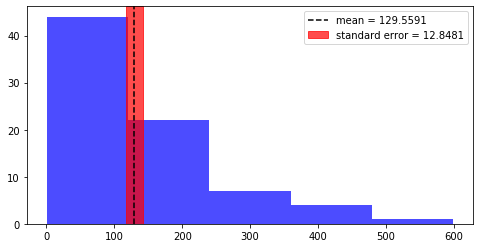

In [0]:
mean = 117
n_samples = 78
np.random.seed(12345)
samples = np.random.exponential(scale = mean, size = n_samples)
fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples,bins = 5,alpha = 0.7,color = 'blue')
_ = ax.axvline(samples.mean(),linestyle = '--',color = 'black',alpha = 1.,label = f'mean = {samples.mean():.4f}')
_ = ax.axvspan(samples.mean() - samples.std()/np.sqrt(n_samples),
               samples.mean() + samples.std() / np.sqrt(n_samples), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples.std() / np.sqrt(n_samples):.4f}')
_ = ax.legend()

In [0]:
stats.ttest_1samp(samples,100)

Ttest_1sampResult(statistic=2.2858733668219404, pvalue=0.025012543966142314)

### [generate from more distributions if you like](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html)

## paired 2-sample t-test

### generate from normal distribution and kinda equal variance, they have to have the same sample size

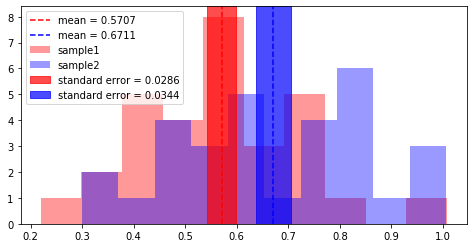

In [0]:
sample_mean1 = 0.52
sample_mean2 = 0.75
sample_sd1 = 0.15
sample_sd2 = 0.19
sample_size1 = 30
sample_size2 = 30

np.random.seed(12345)
samples1 = np.random.normal(sample_mean1,sample_sd1,sample_size1)
samples2 = np.random.normal(sample_mean2,sample_sd2,sample_size2)

fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples1,color = 'red',label='sample1',alpha = 0.4)
_ = ax.hist(samples2,color = 'blue',label='sample2',alpha = 0.4)

_ = ax.axvline(samples1.mean(),linestyle = '--',color = 'red',alpha = 1.,label = f'mean = {samples1.mean():.4f}')
_ = ax.axvspan(samples1.mean() - samples1.std()/np.sqrt(sample_size1),
               samples1.mean() + samples1.std() / np.sqrt(sample_size1), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples1.std() / np.sqrt(sample_size1):.4f}')

_ = ax.axvline(samples2.mean(),linestyle = '--',color = 'blue',alpha = 1.,label = f'mean = {samples2.mean():.4f}')
_ = ax.axvspan(samples2.mean() - samples2.std()/np.sqrt(sample_size2),
               samples2.mean() + samples2.std() / np.sqrt(sample_size2), 
               color = 'blue', alpha = 0.7,label = f'standard error = {samples2.std() / np.sqrt(sample_size2):.4f}')
_ = ax.legend()

In [0]:
stats.ttest_rel(samples1,samples2,)

Ttest_relResult(statistic=-2.1049874165929663, pvalue=0.044072222303606606)

## independent 2-sample t-test

### generate from normal distribution and kinda equal variance and unequal sample size

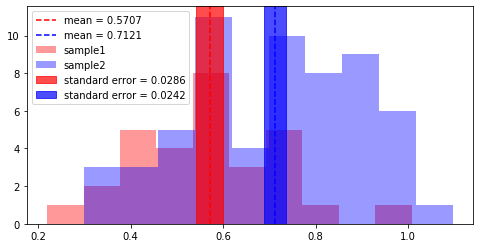

In [0]:
sample_mean1 = 0.52
sample_mean2 = 0.75
sample_sd1 = 0.15
sample_sd2 = 0.19
sample_size1 = 30
sample_size2 = 60 # only change from above

np.random.seed(12345)
samples1 = np.random.normal(sample_mean1,sample_sd1,sample_size1)
samples2 = np.random.normal(sample_mean2,sample_sd2,sample_size2)

fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples1,color = 'red',label='sample1',alpha = 0.4)
_ = ax.hist(samples2,color = 'blue',label='sample2',alpha = 0.4)

_ = ax.axvline(samples1.mean(),linestyle = '--',color = 'red',alpha = 1.,label = f'mean = {samples1.mean():.4f}')
_ = ax.axvspan(samples1.mean() - samples1.std()/np.sqrt(sample_size1),
               samples1.mean() + samples1.std() / np.sqrt(sample_size1), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples1.std() / np.sqrt(sample_size1):.4f}')

_ = ax.axvline(samples2.mean(),linestyle = '--',color = 'blue',alpha = 1.,label = f'mean = {samples2.mean():.4f}')
_ = ax.axvspan(samples2.mean() - samples2.std()/np.sqrt(sample_size2),
               samples2.mean() + samples2.std() / np.sqrt(sample_size2), 
               color = 'blue', alpha = 0.7,label = f'standard error = {samples2.std() / np.sqrt(sample_size2):.4f}')
_ = ax.legend()

In [0]:
stats.ttest_ind(samples1,samples2,equal_var = True)

Ttest_indResult(statistic=-3.5176311972648056, pvalue=0.0006912109659667991)

### generate from normal distribution and unequal vairance and unequal sample size

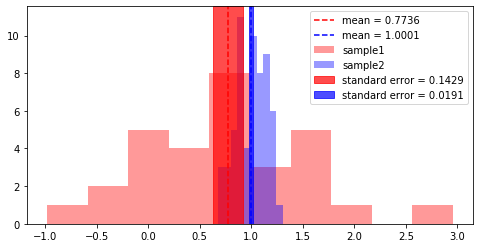

In [0]:
sample_mean1 = 0.52
sample_mean2 = 1.03
sample_sd1 = 0.15 * 5
sample_sd2 = 0.15 #
sample_size1 = 30
sample_size2 = 60 #

np.random.seed(12345)
samples1 = np.random.normal(sample_mean1,sample_sd1,sample_size1)
samples2 = np.random.normal(sample_mean2,sample_sd2,sample_size2)

fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples1,color = 'red',label='sample1',alpha = 0.4)
_ = ax.hist(samples2,color = 'blue',label='sample2',alpha = 0.4)

_ = ax.axvline(samples1.mean(),linestyle = '--',color = 'red',alpha = 1.,label = f'mean = {samples1.mean():.4f}')
_ = ax.axvspan(samples1.mean() - samples1.std()/np.sqrt(sample_size1),
               samples1.mean() + samples1.std() / np.sqrt(sample_size1), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples1.std() / np.sqrt(sample_size1):.4f}')

_ = ax.axvline(samples2.mean(),linestyle = '--',color = 'blue',alpha = 1.,label = f'mean = {samples2.mean():.4f}')
_ = ax.axvspan(samples2.mean() - samples2.std()/np.sqrt(sample_size2),
               samples2.mean() + samples2.std() / np.sqrt(sample_size2), 
               color = 'blue', alpha = 0.7,label = f'standard error = {samples2.std() / np.sqrt(sample_size2):.4f}')
_ = ax.legend()

In [0]:
stats.ttest_ind(samples1,samples2,equal_var = False)

Ttest_indResult(statistic=-1.5454099912243922, pvalue=0.1327234442423455)

# ANOVA

## one-way ANOVA

In [0]:
from sklearn.datasets import load_iris

In [0]:
data,groups = load_iris(return_X_y=True)
print(data[:,0],groups)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
df = pd.DataFrame(np.vstack([data[:,0],groups]).T,columns = ['measures','groups'])
df

,measures,groups
0,5.1,0.0
1,4.9,0.0
2,4.7,0.0
3,4.6,0.0
4,5.0,0.0
...,...,...
145,6.7,2.0
146,6.3,2.0
147,6.5,2.0
148,6.2,2.0


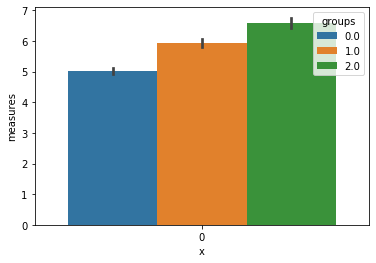

In [0]:
df['x'] = 0
sns.barplot(x = 'x',
            y = 'measures',
            hue = 'groups',
            data = df,
            )

In [0]:
df[df['groups'] == 0]['measures'].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [0]:
stats.f_oneway(df[df['groups'] == 0]['measures'].values,
               df[df['groups'] == 1]['measures'].values,
               df[df['groups'] == 2]['measures'].values,)

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('measures ~ C(groups)',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)



              sum_sq     df           F        PR(>F)     EtaSq
C(groups)  63.212133    2.0  119.264502  1.669669e-31  0.618706
Residual   38.956200  147.0         NaN           NaN       NaN


### multiple comparison

In [0]:
pair_t = mod.t_test_pairwise('C(groups)')
print(pair_t.result_frame)

          coef   std err          t  ...  Conf. Int. Upp.     pvalue-hs  reject-hs
1.0-0.0  0.930  0.102958   9.032819  ...         1.133469  1.776357e-15       True
2.0-0.0  1.582  0.102958  15.365506  ...         1.785469  0.000000e+00       True
2.0-1.0  0.652  0.102958   6.332686  ...         0.855469  2.765638e-09       True

[3 rows x 8 columns]


## 2-way ANOVA

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

In [0]:
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
"Yield ~ C(Fert) + C(Water) + C(Fert):C(Water)"
model = ols('Yield ~ C(Fert)*C(Water)', df).fit() # with interaction
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
print()
print(model.summary())

Overall model F( 3, 16) =  4.112, p =  0.0243

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4.112
Date:                Sun, 24 Nov 2019   Prob (F-statistic):             0.0243
Time:                        16:52:02   Log-Likelihood:                -50.996
No. Observations:                  20   AIC:                             110.0
Df Residuals:                      16   BIC:                             114.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [0]:
res = sm.stats.anova_lm(model, typ= 2)
print(res)

                   sum_sq    df         F    PR(>F)
C(Fert)            69.192   1.0  5.766000  0.028847
C(Water)           63.368   1.0  5.280667  0.035386
C(Fert):C(Water)   15.488   1.0  1.290667  0.272656
Residual          192.000  16.0       NaN       NaN


In [0]:
model2 = ols('Yield ~ C(Fert)+ C(Water)', df).fit() # without interaction
print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")
print()
print(model2.summary())
res2 = sm.stats.anova_lm(model2, typ= 2)
print(res2)

Overall model F( 2, 17) =  5.430, p =  0.0150

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     5.430
Date:                Sun, 24 Nov 2019   Prob (F-statistic):             0.0150
Time:                        16:52:02   Log-Likelihood:                -51.772
No. Observations:                  20   AIC:                             109.5
Df Residuals:                      17   BIC:                             112.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### multiple comparison

In [0]:
mc = statsmodels.stats.multicomp.MultiComparison(df['Yield'], df['Fert'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B    -3.72 0.0459 -7.3647 -0.0753   True
----------------------------------------------------


In [0]:
mc = statsmodels.stats.multicomp.MultiComparison(df['Yield'], df['Water'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low    -3.56 0.0574 -7.2436 0.1236  False
---------------------------------------------------


# resampling

## remember this?

Ttest_1sampResult(statistic=2.2858733668219404, pvalue=0.025012543966142314)


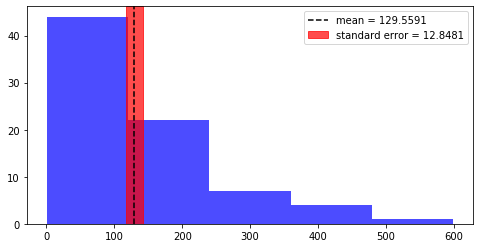

In [0]:
mean = 117
n_samples = 78
np.random.seed(12345)
samples = np.random.exponential(scale = mean, size = n_samples)
fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples,bins = 5,alpha = 0.7,color = 'blue')
_ = ax.axvline(samples.mean(),linestyle = '--',color = 'black',alpha = 1.,label = f'mean = {samples.mean():.4f}')
_ = ax.axvspan(samples.mean() - samples.std()/np.sqrt(n_samples),
               samples.mean() + samples.std() / np.sqrt(n_samples), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples.std() / np.sqrt(n_samples):.4f}')
_ = ax.legend()
print(stats.ttest_1samp(samples,100))

In [0]:
n_sim = 1000
results = []
for _ in range(n_sim):
    resampled = np.random.choice(samples,
                                 size = n_samples,
                                 replace = True, #
                                 )
    resampled_mean = resampled.mean()
    results.append(resampled_mean)
results = np.array(results)

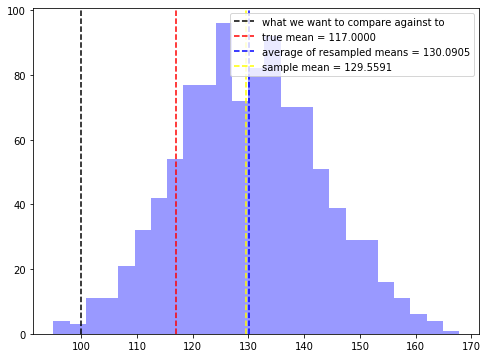

In [0]:
fig,ax = plt.subplots(figsize = (8,6))
_ = ax.hist(results,color = 'blue',bins = 25,alpha = 0.4)
_ = ax.axvline(100,linestyle = '--',color = 'black',label = 'what we want to compare against to')
_ = ax.axvline(mean,linestyle = '--',color = 'red',label = f'true mean = {mean:.4f}')
_ = ax.axvline(results.mean(),linestyle = '--',color = 'blue',label = f'average of resampled means = {results.mean():.4f}')
_ = ax.axvline(samples.mean(),linestyle = '--',color = 'yellow',label = f'sample mean = {samples.mean():.4f}')
_ = ax.legend()

In [0]:
p = (np.sum(results < mean) + 1) / (n_sim + 1)
p / 2

0.07642357642357642

## and this?

Ttest_indResult(statistic=-1.5454099912243922, pvalue=0.1327234442423455)


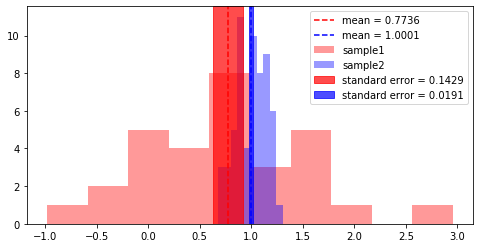

In [0]:
sample_mean1 = 0.52
sample_mean2 = 1.03
sample_sd1 = 0.15 * 5
sample_sd2 = 0.15 #
sample_size1 = 30
sample_size2 = 60 #

np.random.seed(12345)
samples1 = np.random.normal(sample_mean1,sample_sd1,sample_size1)
samples2 = np.random.normal(sample_mean2,sample_sd2,sample_size2)

fig,ax = plt.subplots(figsize = (8,4))
_ = ax.hist(samples1,color = 'red',label='sample1',alpha = 0.4)
_ = ax.hist(samples2,color = 'blue',label='sample2',alpha = 0.4)

_ = ax.axvline(samples1.mean(),linestyle = '--',color = 'red',alpha = 1.,label = f'mean = {samples1.mean():.4f}')
_ = ax.axvspan(samples1.mean() - samples1.std()/np.sqrt(sample_size1),
               samples1.mean() + samples1.std() / np.sqrt(sample_size1), 
               color = 'red', alpha = 0.7,label = f'standard error = {samples1.std() / np.sqrt(sample_size1):.4f}')

_ = ax.axvline(samples2.mean(),linestyle = '--',color = 'blue',alpha = 1.,label = f'mean = {samples2.mean():.4f}')
_ = ax.axvspan(samples2.mean() - samples2.std()/np.sqrt(sample_size2),
               samples2.mean() + samples2.std() / np.sqrt(sample_size2), 
               color = 'blue', alpha = 0.7,label = f'standard error = {samples2.std() / np.sqrt(sample_size2):.4f}')
_ = ax.legend()

print(stats.ttest_ind(samples1,samples2,equal_var=False))

In [0]:
np.random.seed(12345)
diffs = []
for _ in range(100):
    group1_ = np.random.choice(samples1,size = 1000, replace = True)
    group2_ = np.random.choice(samples2,size = 1000, replace = True)

    diff = group1_.mean() - group2_.mean()
    diffs.append(diff)
diffs = np.array(diffs)

(array([ 2.,  1.,  5., 11., 11., 22., 18., 13., 13.,  4.]),
 array([-0.30468451, -0.29166492, -0.27864533, -0.26562574, -0.25260615,
        -0.23958656, -0.22656697, -0.21354738, -0.20052779, -0.18750819,
        -0.1744886 ]),
 <a list of 10 Patch objects>)

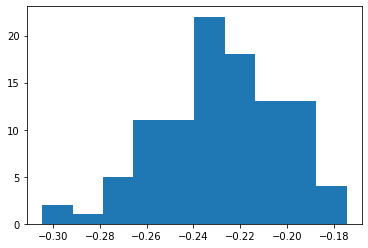

In [0]:
plt.hist(diffs)

In [0]:
mean_difference_between_samples = samples1.mean() - samples2.mean()

pool = np.concatenate([samples1,samples2])
np.random.seed(12345)
results = []
for _ in range(n_sim):
    np.random.shuffle(pool)
    new_samples1 = pool[:samples1.shape[0]]
    new_samples2 = pool[samples1.shape[0]:]

    new_mean_difference_between_samples = new_samples1.mean() - new_samples2.mean()
    results.append(new_mean_difference_between_samples)
results = np.array(results)

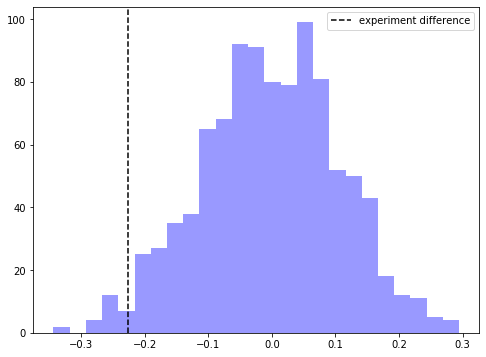

In [0]:
fig,ax = plt.subplots(figsize = (8,6))
_ = ax.hist(results,bins = 25,alpha = 0.4,color = 'blue')
_ = ax.axvline(mean_difference_between_samples,linestyle = '--', color = 'black',label = 'experiment difference')

_ = ax.legend()

In [0]:
p = (np.sum(results < mean_difference_between_samples) + 1) / (n_sim + 1)
p / 2

0.01048951048951049

In [0]:
np.random.seed(12345)
responses = np.random.choice([0,1],size = 25, )
corrects = np.random.choice([0,1],size = 25)

In [0]:
performance = np.sum(responses == corrects) / len(responses)
print(performance)

0.6


In [0]:
import pandas as pd

df = pd.DataFrame(np.vstack([responses,corrects]).T,columns = ['response','corrects'])
df

,response,corrects
0,0,0
1,1,1
2,1,0
3,1,0
4,0,1
5,1,1
6,0,1
7,0,1
8,1,1
9,0,0


In [0]:
np.arange(len(responses))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
range(len(responses))

range(0, 100)

In [0]:
res = []
for _ in range(100):
    idx = np.random.choice(np.arange(len(responses)),size = 1000, replace = True)
    reps = responses[idx]
    corr = corrects[idx]
    res.append( np.sum(reps == corr) / 1000)
res = np.array(res)

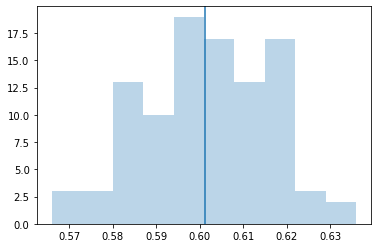

In [0]:
plt.hist(res,alpha = 0.3)
plt.axvline(res.mean())